In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import socket
import pandas as pd
import time

HOST = '0.0.0.0'
PORT = 7000

s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect((HOST, PORT))

In [ ]:
col = ['P', 'week', 'month', 'date', 'time', 'year', 'sec', 'Application', 'valid']
inputdata = ["9.0","Thu","Dec","23","22:55:59","2021","1640271360","lamp","Y"]

#while True:
for i in range(5):
    #inputdata = list(map(int,input("\nEnter the numbers : ").strip().split()))[:2]
    
    
    df = pd.DataFrame([inputdata], columns = col)
                  
    print(df)
    df_string = df.to_json()
    
    s.send(df_string.encode())


    indata = s.recv(1024)
    if len(indata) == 0: # connection closed
        s.close()
        print('server closed connection.')
        break
    print('recv: ' + indata.decode())
    
    time.sleep(7)
    df["P"] = str(i*i + 5)

     P week month date      time  year         sec Application valid
0  9.0  Thu   Dec   23  22:55:59  2021  1640271360        lamp     Y
recv: data echo confirmed
     P week month date      time  year         sec Application valid
0  9.0  Thu   Dec   23  22:55:59  2021  1640271360        lamp     Y
recv: data echo confirmed
     P week month date      time  year         sec Application valid
0  9.0  Thu   Dec   23  22:55:59  2021  1640271360        lamp     Y
recv: data echo confirmed
     P week month date      time  year         sec Application valid
0  9.0  Thu   Dec   23  22:55:59  2021  1640271360        lamp     Y
recv: data echo confirmed
     P week month date      time  year         sec Application valid
0  9.0  Thu   Dec   23  22:55:59  2021  1640271360        lamp     Y
recv: data echo confirmed


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

d = {'col1': [1, 2, 3], 'col2': [3, 4, 5]}
df = pd.DataFrame(data=d)
df['col1'] = df['col1'].astype(str)  #this column should be time
f = {'col1': [7, 9], 'col2': [12, 3]}
df1 = pd.DataFrame(data=f)
pd.concat([df, df1], ignore_index=True)

,col1,col2
0,1,3
1,2,4
2,3,5
3,7,12
4,9,3


Tue Dec 21
------------------------------------------------------------
Wed Dec 22
Empty DataFrame
Columns: []
Index: []
------------------------------------------------------------


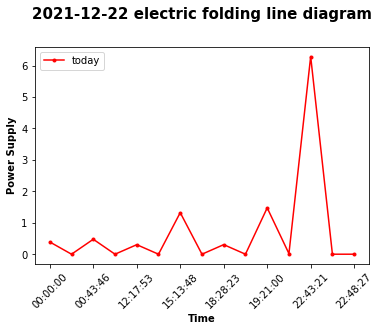

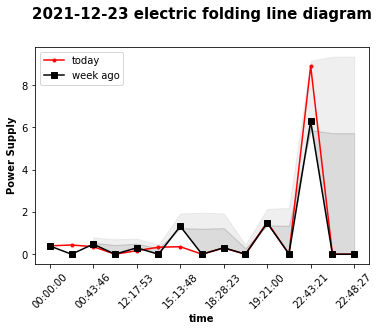

In [48]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy
day_in_now = datetime.date.today()
day_in_21ago = day_in_now + datetime.timedelta(days=-21)
def export_line_chart(df, df_week_ago, today):
    ax = df.plot(x='time', y = 'supply_use', kind = 'line', c = "r", style=".-", label="today", rot=45, grid=False)
    
    # 設定圖例，參數為標籤、位置
    ax.legend(loc = 'best')
    ax.set_xlabel("Time", fontweight = "bold")                # 設定x軸標題及粗體
    ax.set_ylabel("Power Supply", fontweight = "bold")    # 設定y軸標題及粗體
    ax.set_title(label=str(today)+" electric folding line diagram", fontsize = 15, fontweight = "bold", y = 1.1)   
    # 設定標題、文字大小、粗體及位置
    ax.set_facecolor('white')
    
    if df_week_ago.empty:
        fig = ax.get_figure()
    else:
        plot = df_week_ago.plot(x='time', y = 'supply_use', kind = 'line', c = "k", style='s-', label="week ago", 
                                ax=ax, rot=45, grid=False) # 將x軸數字旋轉45度，避免文字重疊, 且移除格子
        ma = df_week_ago['supply_use'].rolling(3).mean() #計算均線
        mstd = df_week_ago['supply_use'].rolling(3).std() #計算標準差
        plot.fill_between(mstd.index, df_week_ago['supply_use'], ma+1*mstd, color='0.3', alpha=0.2) #draw *1 標準差
        plot.fill_between(mstd.index, ma+1*mstd, ma+2*mstd, color='0.7', alpha=0.2) #draw *2 標準差
        
        fig = plot.get_figure()
    fig.savefig("picture/"+str(today)+"_Line chart.jpg",   # 儲存圖檔
                bbox_inches='tight',               # 去除座標軸占用的空間
                pad_inches=0.0)

size = []
def absolute_value(val):
    a  = sum(size)*val/100
    return '{:.1f}%\n({:.2f})'.format(val, a)
    
def export_pie_chart(df, col, today):
    #pie chart
    plt.figure(figsize=(6,9))    # 顯示圖框架大小
    lamp_sum = df.loc[df['Application'] == "lamp", col].sum()
    cellphone_sum = df.loc[df['Application'] == "cellphone", col].sum()
    hairdryer_sum = df.loc[df['Application'] == "hairdryer", col].sum()
    #print(lamp_sum, hairdryer_sum)
    labels = ["lamp", "cellphone", "hairdry"]      # 製作圓餅圖的類別標籤
    global size
    if col == "time_use":
        size = [lamp_sum/60, cellphone_sum/60, hairdryer_sum/60]                         # 製作圓餅圖的數值來源
    else:
        size = [lamp_sum, cellphone_sum, hairdryer_sum]
    plt.pie(size,                           # 數值
            labels = labels,                # 標籤
            autopct = absolute_value,       # 將數值百分比並留到小數點一位且保留真實數值
            pctdistance = 0.6,              # 數字距圓心的距離
            textprops = {"fontsize" : 12},  # 文字大小
            shadow=True)                    # 設定陰影


    plt.axis('equal')                                          # 使圓餅圖比例相等
    plt.title(str(today) + " " + col + " ratio", {"fontsize" : 18})  # 設定標題及其文字大小
    plt.legend(loc = "best")                                   # 設定圖例及其位置為最佳

    plt.savefig('picture/'+str(today) + " " + col + " ratio.jpg",   # 儲存圖檔
                bbox_inches='tight',               # 去除座標軸占用的空間
                pad_inches=0.0)                    # 去除所有白邊
    plt.close()      # 關閉圖表    

def get_electricity_information(df):
    if df.empty:
        return df
    df["last_sec"] = df["sec"].shift(-1)
    df["last_sec"] = df['last_sec'].fillna(df['sec']) #remove NaN
    df["time_use"] = (df["last_sec"].astype(int) - df["sec"].astype(int))
    df["supply_use"] = (df["P"].astype(float)*df["time_use"])/1000 #unit : 1000J
    #P(W)*time(S) = energy(J)
    #print(df)
    return df

df_res = pd.DataFrame()
df_week_ago_res = pd.DataFrame()
today_date_str = str()
# right method 
with pd.ExcelFile('data_storage/pandas_simple.xlsx') as xls:
    
    for sheet_name in xls.sheet_names:  #get sheet_name
        df1 = pd.read_excel(xls, sheet_name=sheet_name)
        df = get_electricity_information(df1) #put electricity information into df
        
        month_tmp = datetime.datetime.strptime(df["month"][0], "%b")
        sheet_date = str(df['year'][0])+"-"+str(month_tmp.month)+"-"+str(df['date'][0])
        
        tmp = datetime.datetime.strptime(sheet_date, "%Y-%m-%d")
        week_ago_date = (tmp + datetime.timedelta(days=-7)).strftime("%a %b %d")
        week_ago_date = week_ago_date.replace("0", " ") #find week ago's sheet name
        print(week_ago_date)
        
        df_week_ago1 = pd.DataFrame()
        if week_ago_date in xls.sheet_names:
            df_week_ago1 = pd.read_excel(xls, sheet_name=week_ago_date)
            print(df_week_ago.head(2))
        df_week_ago = get_electricity_information(df_week_ago1) #put electricity information into df
        
        if str(today) == sheet_name:
            df_res = df
            df_week_ago_res = df_week_ago
            today_date_str = sheet_date
        else:
            export_line_chart(df, df_week_ago, sheet_date) #draw line chart
            export_pie_chart(df, "supply_use", sheet_date) #draw supply_use pie chart
            export_pie_chart(df, "time_use", sheet_date) #draw time_use pie chart
        #print(df)
        
        print("------------------------------------------------------------")